<table>
<tr style="border:none;">
<td style="border:none;"><a href="https://fra.utn.edu.ar/">
<image src="https://raw.githubusercontent.com/frautn/F2-electromagnetismo/main/assets_python/logoUTN-500.svg"  width="100">
</a></td>
<td style="border:none;"><font face="times" size=4>Física 2<br>2024<br>Electromagnetismo<br>Material para trabajo en clase</font>
</td>
</tr>
</table>

</br>

<table>
<tr style="border:none;">
<td style="border:none;"><a href="https://creativecommons.org/licenses/by-nc-sa/4.0/deed.es"><image src="https://raw.githubusercontent.com/frautn/F2-electromagnetismo/main/docs/assets/img/by-nc-sa.svg" width="70" /></a></td>
<td style="border:none;"><font face="times" size=4>2024 Edgardo Palazzo (epalazzo@fra.utn.edu.ar)</font>
</td>
</tr>
</table>

# Actividad 01

---

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import sqrt, cos, sin, pi
import sys

np.seterr(divide='ignore')  # Elimina advertencia al dividir por cero.
# %precision %.3f

!pip install --index-url https://test.pypi.org/simple/ --no-deps --upgrade frautnEM
from frautnEM.puntuales import Ef, V, plotEf, plotEfVector, equipotencialesPuntuales

try:
  import google.colab
  IN_COLAB = True
except:
  IN_COLAB = False

if IN_COLAB:
  !pip --quiet install ipympl
  from google.colab import output
  output.enable_custom_widget_manager()

# Figuras interactivas.
# Comentar si se quiere mantener las figuras luego de cerrar el cuaderno.
# %matplotlib widget

Looking in indexes: https://test.pypi.org/simple/


## Ejercicio 1:

Considerar un hilo de longitud $L = 15\,\text{cm}$, con carga total de $40\,\text{nC}$ distribuida uniformemente, ubicado como se muestra en la figura, siendo $d = 3\,\text{cm}$.

<div style="text-align: center;">
       <image src="https://raw.githubusercontent.com/frautn/F2-electromagnetismo/main/modulos/img/actividad01_segmento.svg" width="500">
</div>


a) Encontrar una posición aproximada donde ubicar una carga puntual de $2\,\mu\text{C}$, para que el campo eléctrico total en el origen sea horizontal y apunte hacia la izquierda ($-x$).


In [8]:
# 1) Escribir la lista de pequeñas cargas que conforman el hilo.

# Si fueran 4 cargas, el formato es el siguiente:

# Q = [
#     [q1, x1, y1, z1],
#     [q2, x2, y2, z2],
#     [q3, x3, y3, z3],
#     [q4, x4, y4, z4],
# ]

# Recordar que cada carga debe estar en el centro del segmento correspondiente.

# Llamar a esta lista Q1.

Q1 = [
     [ 8E-9, 0.015, -0.03, 0],
     [ 8E-9, 0.045, -0.03, 0],
     [ 8E-9, 0.075, -0.03, 0],
     [ 8E-9, 0.105, -0.03, 0],
     [ 8E-9, 0.135, -0.03, 0],
 ]

In [ ]:
# Opcional: Si se desea particionar al hilo en un número grande de cargas, es necesario un ciclo for como el utilizado en el cuaderno 03 (adaptar el siguiente ejemplo):

# Qtotal = 1E-9
# N = 20
# dq = Qtotal/N
# dx = L/N
# # Valor inicial de x (el centro del primer "diferencial" de longitud dx):
# x0 = -L/2 + dx/2
# Q1 = []
# for i in range(N):
#     Q1 = Q1 + [[dq, x0+i*dx,0,0]]

In [41]:
# 2) Calcular el campo del hilo en el origen.

# Utilizar la función de la biblioteca: Ef(x,y,z,Q)
# Reemplazar los valores de x, y, z del punto donde se desea el campo, y Q con el
# nombre de la lista de cargas.
Ef(0,0,0,Q1)



(-68828.65293997068, 77470.97588826048, 0.0)

In [84]:
# 3) Decidir alguna posición donde ubicar la carga puntual, escribir la lista (de un solo elemento) de carga Q2, y calcular el campo en el origen sumando las componentes de ambos campos.

# Reemplazar x, y, z con la posición donde se desea el campo y calcular
# las componentes para cada uno. Luego sumarlas.


Q2 = [
    [2E-6, 0.09, 0.322163, 0],
]

x = 0
y = 0
z = 0

Ei1, Ej1, Ek1 = Ef(x,y,z,Q1)
Ei2, Ej2, Ek2 = Ef(x,y,z,Q2)
Ei1 + Ei2, Ej1 + Ej2, Ek1 + Ek2

(-112113.30534499112, -77470.28492016839, 0.0)

In [85]:
# 5) Repetir el procedimiento hasta encontrar una posición para Q2 que cumpla con lo pedido.

In [86]:
# 6) Mostrar la respuesta.

# Ejecutar Q2 para mostrar la carga y su posición y E1+E2 para mostrar el resultado del campo.

In [87]:
Q2

[[2e-06, 0.09, 0.322163, 0]]

In [88]:
Ei1, Ej1, Ek1 = Ef(x,y,z,Q1)
Ei2, Ej2, Ek2 = Ef(x,y,z,Q2)
Ei1 + Ei2, Ej1 + Ej2, Ek1 + Ek2

(-112113.30534499112, -77470.28492016839, 0.0)

**Respuesta**:

Escribir la respuesta en este lugar.

b) Calcular el potencial eléctrico en el origen.

In [91]:
# Usar la función de la biblioteca V(x,y,z,Q) y sumar los voltajes debido a Q1 y Q2.
V(x,y,z,Q1) + V(x,y,z,Q2)


59361.167280586385

**Respuesta**:

Escribir la respuesta en este lugar.

c) Graficar las líneas de campo en el plano $xy$ con la carga puntual en la posición seleccionada.

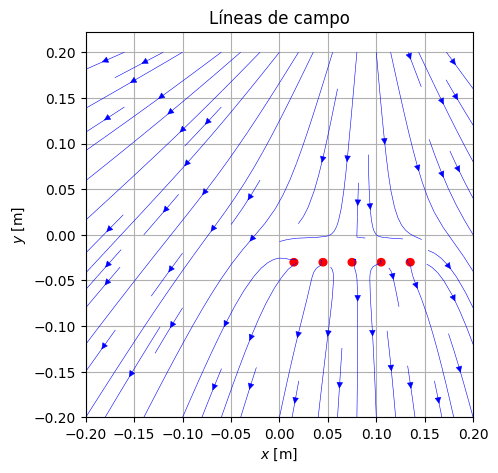

In [92]:
# Para graficar necesitamos el campo total, y para eso debemos unificar
# todas las cargas en una misma lista.
# El código para juntar Q1 y Q2 en una misma lista es el siguiente:

# Qtotal = Q1 + Q2

# El gráfico se genera con la función de la biblioteca plotEf(Q)

# Si se desea cambiar el rango de x e y, incluir los valores en dx: plotEf(Q, dx)
plotEf(Q1 + Q2, dx=0.2)

d) Encontrar otra posición para la misma carga puntual tal que el campo eléctrico total sea aproximadamente cero en el origen.

In [ ]:
# Ayuda:
# - Calcular el campo del hilo en el origen.
# - Calcular la tangente del ángulo para ese vector.
# - La carga puntual debe estar ubicada sobre la misma recta que este vector, entonces
#   las coordenadas x e y de la carga puntual cumplen con la misma relación para la tangente.
#   Escribir una relación entre x e y con esa información.
# - Modificar solo una variable (x o y) hasta encontrar que el campo total sea aproximadamente cero.





**Respuesta**:

Escribir la respuesta en este lugar.

## Ejercicio 2:

En la figura se muestran el alambre 1 de longitud $L_1 = 15\,\text{cm}$ y el alambre 2 de longitud $L_2 = 6\, \text{cm}$, donde $d = 3\,\text{cm}\,.$

<div style="text-align: center;">
       <image src="https://raw.githubusercontent.com/frautn/F2-electromagnetismo/main/modulos/img/actividad01_dos_segmentos.svg" width="500">
</div>

Ambos alambres están cargados uniformemente. La carga total del alambre 1 es $400\,\text{nC}$ y la del alambre 2 es $-400\,\text{nC}\,.$

a) Graficar las equipotenciales de esta distribución en el plano $xy$. Incluir las líneas de campo en la misma figura.

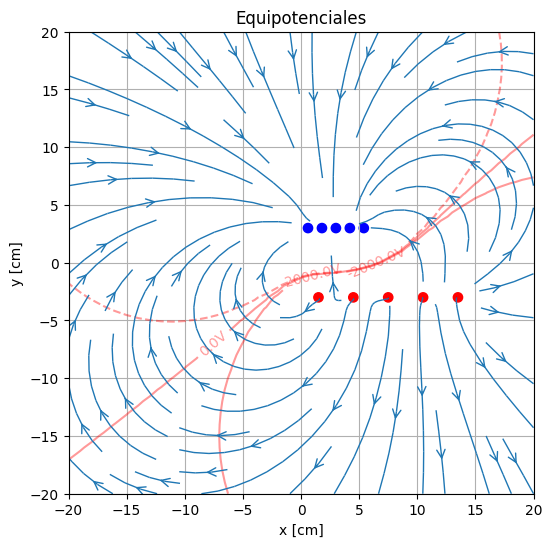

In [100]:
# Recomendaciones:
# 1. Crear las listas de cargas para cada segmento y sumarlas Qtotal = Q1 + Q2,
#    o armar directamente una única lista con las cargas de ambos segmentos.
# 2. Hacer un gráfico preliminar para tener una idea de los valores de las equipotenciales.
#    equipotencialesPuntuales(Qtotal)
# 3. Se eligen cuáles equipotenciales mostrar en una lista.

#    levels = [-200, -100, 0 , 40, 60, 80, 120, 240]

# 4. Graficar las equipotenciales con las líneas de campo, ajustando el valor de "dim"
#    para obtener una buena visualización.

#    equipotencialesPuntuales(Qtotal, EF=True, levels = levels, dim=20)

Q1 = [
     [ 80E-9, 0.015, -0.03, 0],
     [ 80E-9, 0.045, -0.03, 0],
     [ 80E-9, 0.075, -0.03, 0],
     [ 80E-9, 0.105, -0.03, 0],
     [ 80E-9, 0.135, -0.03, 0],
 ]
Q2 = [
     [ -80E-9, 0.006 , 0.03, 0],
     [ -80E-9, 0.018 , 0.03, 0],
     [ -80E-9, 0.03 , 0.03, 0],
     [ -80E-9, 0.042 , 0.03, 0],
     [ -80E-9, 0.054 , 0.03, 0],
 ]
Qtotal = Q1 + Q2
levels = [-2000, 0 , 2000]
equipotencialesPuntuales(Qtotal, EF=True, levels = levels, dim=20)

b) Calcular el potencial en el origen.

In [96]:
# Cálculo del potencial:

Ef(0,0,0,Q1+Q2)

(-576165.6153707067, 953736.2877555221, 0.0)

**Respuesta**:

Escribir la respuesta en este lugar.

c) Encontrar alguna posición en el eje $x$ tal que el potencial sea aproximadamente cero.

In [ ]:
# Aprovechar el gráfico de las equipotenciales para unicar ese punto.




In [ ]:
x = 0.066888
y = 0
z = 0
V(x,y,z,Qtotal)

**Respuesta**:

Escribir la respuesta en este lugar.

d) Calcular la fuerza neta que el alambre 2 ejerce sobre el alambre 1.

In [101]:
# Con un ciclo "for", se calcula el campo producido por el alambre superior
#    Ef(x,y,z,Q2)
# en la posición de cada porción del alambre inferior, y se multiplican sus
# componentes por la carga de dicha porción de alambre:
#    Fi = q*Ei
# Se suman todas estas fuerzas en cada componente para obtener las componentes
# de la fuerza neta.

Fi = 0
Fj = 0
Fk = 0
for q1 in Q1:
    x = q1[1]
    y = q1[2]
    z = q1[3]
    Ei, Ej, Ek = Ef(x,y,z,Q2)
    Fi = Fi + q1[0] * Ei
    Fj = Fj + q1[0] * Ej
    Fk = Fk + q1[0] * Ek
Fi, Fj, Fk

(-0.06955801513836947, 0.21018378206409635, 0.0)

**Respuesta**:

Escribir la respuesta en este lugar.

b) En lugar de la fuerza total, analizar las fuerzas que sienten cada porción del alambre inferior.

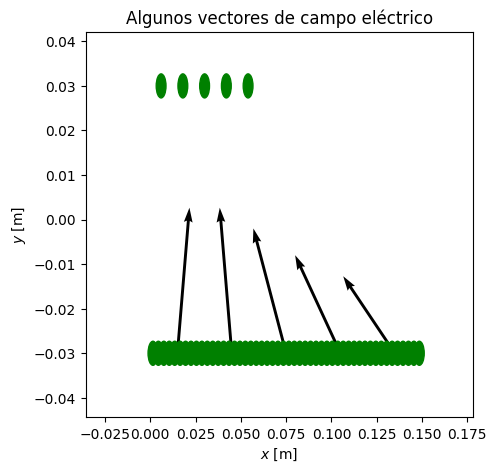

In [102]:
# Una lista de objetos puntuales con carga 0 para graficar la varilla inferior y
# no calcular su campo, solo queremos el campo de la varilla 2 en las posiciones
# de la varilla 1.
Qneta = 0
L = 0.15
N = 50
dq = Qneta/N
dx = L/N
# Valor inicial de x (el centro del primer "diferencial" de longitud dx):
x0 = dx/2
Qcero = []
for i in range(N):
    Qcero = Qcero + [[dq, x0+i*dx, -0.03,0]]

Qtotal2 = Q2 + Qcero

# Posiciones donde queremos los vectores campo eléctrico.
X = [[0.015,-0.03,0],[0.045,-0.03,0],[0.075,-0.03,0],[0.105,-0.03,0], [0.135,-0.03,0]]

plotEfVector(Ef, Qtotal2, X, scale=20)

Suponiendo que el alambre 1 (el inferior) se libera, y teniendo en cuenta la fuerza total y estos vectores del campo eléctrico producidos por el alambre 2 en las posiciones del alambre 1, describir el movimiento inicial del alambre inferior.

**Respuesta**:

Escribir la respuesta en este lugar.

# Si soltaramos el alambre de abajo lo que analiticamente sucederia seria que se desplazaria levemente hacia la izquierda y el extremo izquierdo se levantaria con mas fuerza respecto del extremo derecho, lo que provocaria un momento en el cuerpo (se inclina en el aire y *puede llegar* a girar)...